In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [38]:
dataframe = pd.read_csv('bank_marketing_weka_dataset.csv')
continous_cols = ['balance', 'duration', 'pdays', 'previous']

In [39]:
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79.0,1,-1.0,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220.0,1,339.0,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185.0,1,330.0,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199.0,4,-1.0,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226.0,1,-1.0,0,unknown,no


__age__ 	-integer- 	__Age of client__: 
* numerical value <br>

__job__ 	-string- 	__Type of job__: 
* admin. 
* blue-collar
* entrepreneur
* housemaid
* management
* retired
* self-employed 
* services
* student
* technician
* unemployed
* unknown <br>

__marital__ 	-string- 	__Marital status__: 
* divorced 
* married
* single
* unknown <br>

__education__ 	-string- 	__Level of education__:
* primary 
* secondary
* tertiary
* unknown <br>

__default__ 	-string- 	__Has credit in default__: 
* no
* yes
* unknown <br>

__balance__ 	-integer- 	__Average yearly balance in Euro__:
* numerical value <br>

__housing__ 	-string- 	__Has housing loan__:
* no
* yes
* unknown <br>

__loan__ 	-string- 	__Has personal loan__: 
* no
* yes
* unknown <br>

__contact__ 	-string- 	__Communication type__:
* unknown
* telephone
* cellular <br>

__day__ 	-integer- 	__Day of the month__:
* numerical value between 1 and 31 <br>

__month__ 	-string- 	__Month of the year__: 
* jan
* feb
* mar
* apr 
* may 
* jun
* jul
* aug
* sep
* oct
* nov
* dec <br>

__duration__ 	-float- 	__Last contact duration__:
* numerical value in seconds <br>

__campaign__ 	-integer- 	__Number of contacts made__:
* numerical value <br>

__pdays__ 	-float- 	__Number of days passed since client was last contacted from a previous campaign__: 
* numerical value
* -1 indicates client was not previously contacted <br>

__previous__	-integer-	__Number of contacts performed before this campaign and for this client__:
* numerical value

__poutcome__	-string-	__Outcome of previous marketing campaign__:
* unknown
* other
* failure
* success

__y__ 	-string- 	__Predictor class__: 
* yes
* no <br>

## Wstępna eksploracja danych

### Rozkład wieku 

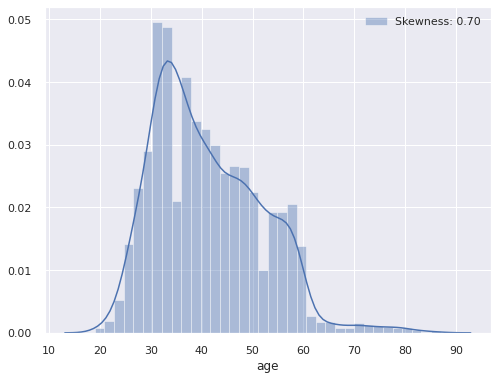

In [40]:
plt.figure(figsize=(8,6))
sns.distplot(dataframe.age, label='Skewness: %.2f' % (dataframe.age.skew()))
plt.legend()
plt.show()

### Zawody wykonywane

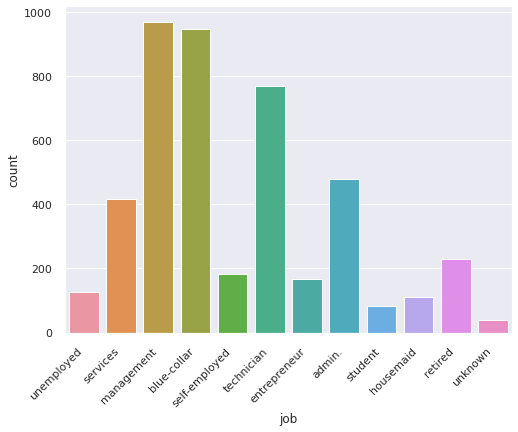

In [41]:
sns.set(style="darkgrid")

fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x='job', data=dataframe)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### Rozkład stanu cywilnego

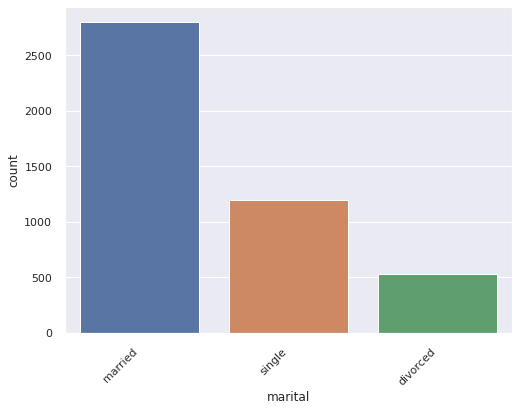

In [42]:
sns.set(style="darkgrid")

fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x='marital', data=dataframe)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### Rozkład wykształcenia

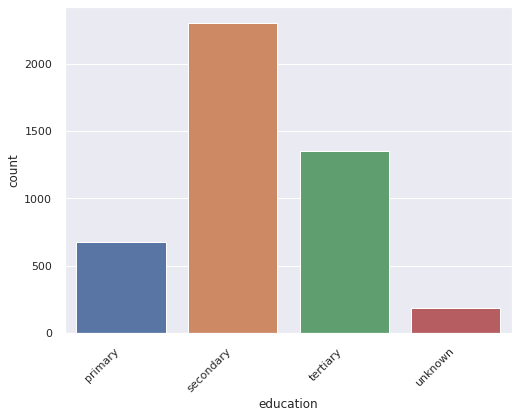

In [29]:
sns.set(style="darkgrid")

fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x='education', data=dataframe)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### Rozkład bilansu konta 

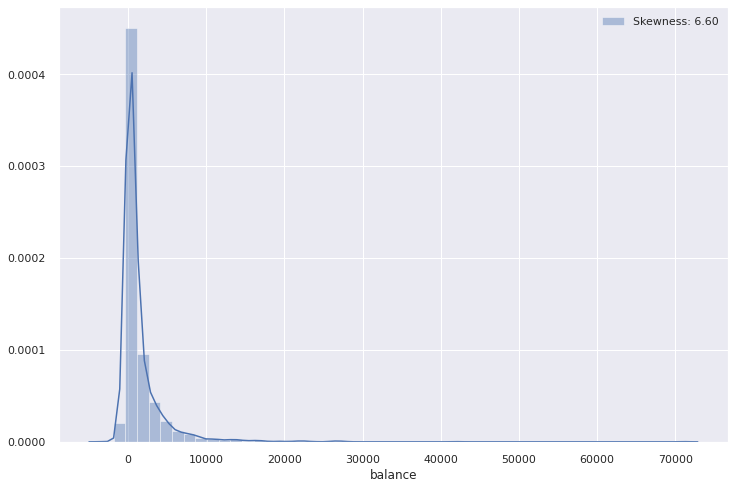

In [13]:
plt.figure(figsize=(12,8))
sns.distplot(dataframe.balance, label='Skewness: %.2f' % (dataframe.balance.skew()))
plt.legend()
plt.show()

### Rozkład po usunięciu outlierów

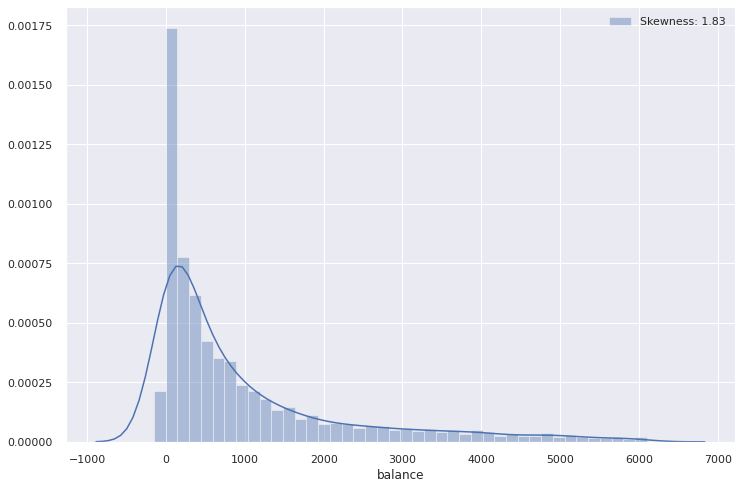

In [14]:
plt.figure(figsize=(12,8))
sns.distplot(dataframe[(dataframe.balance.quantile(0.05) < dataframe.balance) & (dataframe.balance < dataframe.balance.quantile(0.95))].balance, label='Skewness: %.2f' % (dataframe[(dataframe.balance.quantile(0.05) < dataframe.balance) & (dataframe.balance < dataframe.balance.quantile(0.95))].balance.skew()))
plt.legend()
plt.show()

### Rozkład czasu trwania

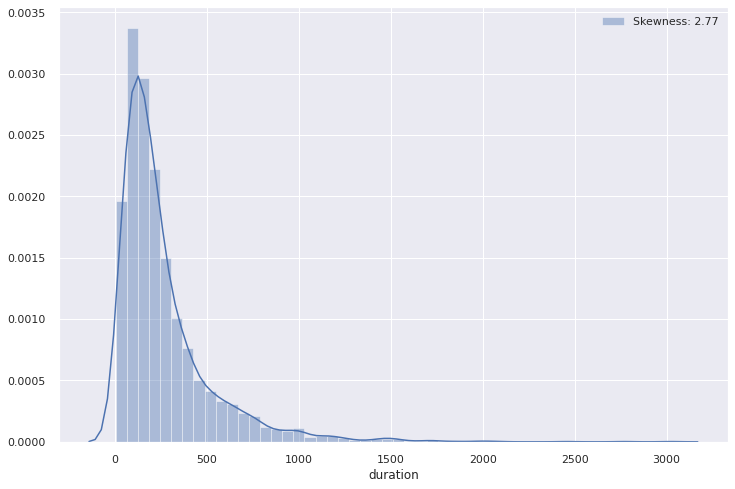

In [15]:
plt.figure(figsize=(12,8))
sns.distplot(dataframe.duration, label='Skewness: %.2f' % (dataframe.duration.skew()))
plt.legend()
plt.show()

### Boxploty kolumn ciągłych

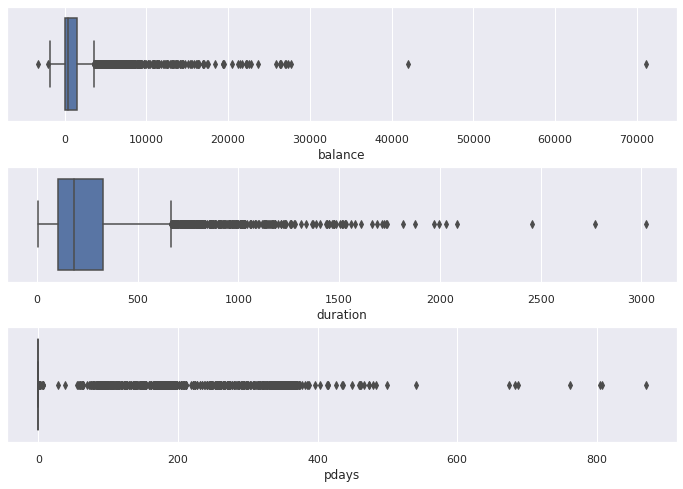

In [22]:
sns.set(style="darkgrid")

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 4):
    ax = fig.add_subplot(3, 1, i),
    ax = sns.boxplot(x=dataframe[continous_cols[i-1]])

### Pairplot kolumn ciągłych

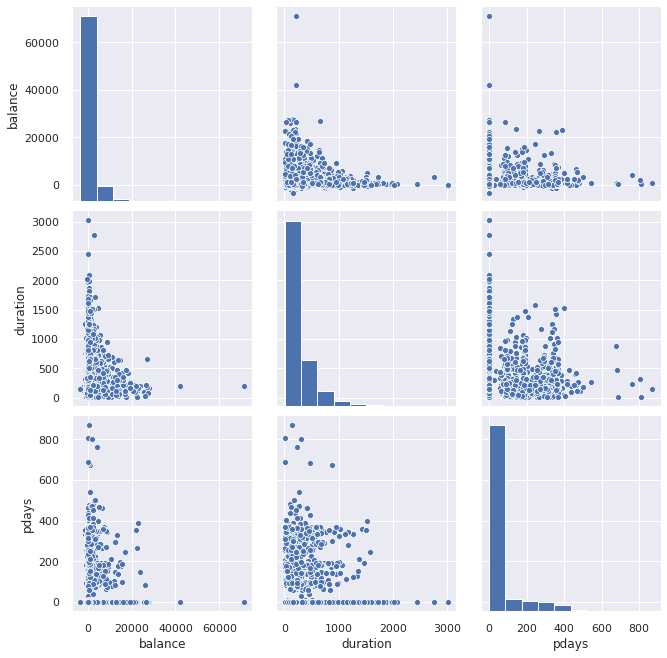

In [36]:
sns.pairplot(dataframe[continous_cols], height=3)
plt.show()

### Mapa ciepła korelacji

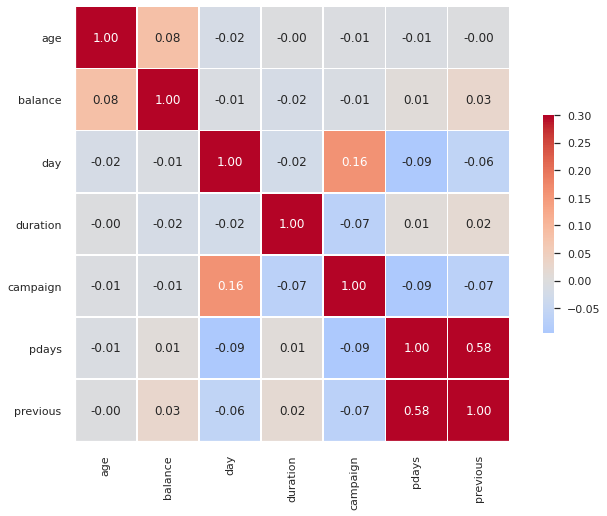

In [17]:
corr = dataframe.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(12,8)
    
plt.show()

### Scatterplot między dwoma najbardziej skorelowanymi kolumnami

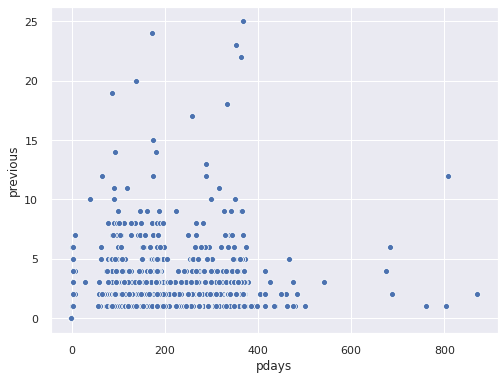

In [22]:
fig = plt.figure(figsize=(8,6))
ax = sns.scatterplot(data=dataframe, x = 'pdays', y = 'previous')